<a href="https://colab.research.google.com/github/Schwarzam/Gus/blob/master/Predicting%20Fake%20News%20com%20teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
true = pd.read_csv('/content/drive/My Drive/Projeto /fake-and-real-news-dataset/True.csv')

In [0]:
fake = pd.read_csv('/content/drive/My Drive/Projeto /fake-and-real-news-dataset/Fake.csv')

In [0]:
Data_train = pd.read_csv('/content/drive/My Drive/Projeto /fake-news/train.csv')

In [5]:
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [6]:
len(list(fake['title']))

23481

In [7]:
len(list(true['date']))

21417

In [0]:
Ttext = (true['text'])
Ftext = (fake['text'])
Ttit = (true['title'])
Ftit = (fake['title'])

In [9]:
#hot encoding text
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(Ttext)

Ttext = tokenizer.texts_to_matrix(Ttext, mode='binary')

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(Ftext)

Ftext = tokenizer.texts_to_matrix(Ftext, mode='binary')

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(Ttit)

Ttit = tokenizer.texts_to_matrix(Ttit, mode='binary')

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(Ftit)

Ftit = tokenizer.texts_to_matrix(Ftit, mode='binary')

Using TensorFlow backend.


In [0]:
#1 for True and 0 for Fake
T = np.ones(21417,)
F = np.zeros(23481,)

In [0]:
Conc = np.concatenate((T, F))
del T
del F

In [0]:
Cseq = np.concatenate((Ttext, Ftext))
Ctit = np.concatenate((Ttit, Ftit))
del Ttext
del Ftext
del Ttit
del Ftit
CC = np.concatenate((Cseq, Ctit),axis=1)

In [0]:
X_train = CC[7000:37000]
y_train = Conc[7000:37000]

In [0]:
x_val = np.concatenate((CC[0:6999],CC[37000:44898]))
y_val = np.concatenate((Conc[0:6999],Conc[37000:44898]))

In [0]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
#model.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.01), activation='relu'))
#model.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(16, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.00085),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 30000 samples, validate on 14897 samples
Epoch 1/10
30000/30000 [==============================] - 4s 118us/step - loss: 0.3220 - acc: 0.8586 - val_loss: 0.6608 - val_acc: 0.7430
Epoch 2/10
30000/30000 [==============================] - 3s 115us/step - loss: 0.1100 - acc: 0.9597 - val_loss: 0.4081 - val_acc: 0.8757
Epoch 3/10
30000/30000 [==============================] - 3s 113us/step - loss: 0.0494 - acc: 0.9825 - val_loss: 0.5479 - val_acc: 0.8513
Epoch 4/10
30000/30000 [==============================] - 3s 113us/step - loss: 0.0256 - acc: 0.9913 - val_loss: 0.3852 - val_acc: 0.9176
Epoch 5/10
30000/30000 [==============================] - 3s 114us/step - loss: 0.0117 - acc: 0.9959 - val_loss: 0.4693 - val_acc: 0.9013
Epoch 6/10
30000/30000 [==============================] - 3s 112us/step - loss: 0.0048 - acc: 0.9982 - val_loss: 0.4313 - val_acc: 0.9276
Epoch 7/10
30000/30000 [==============================] - 3s 113us/step - loss: 0.0107 - acc: 0.9968 - val_loss: 0.4880 - 

<function matplotlib.pyplot.show>

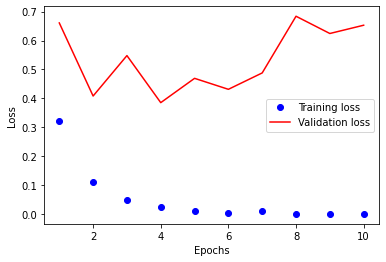

In [17]:
histo = history.history
loss_values = histo['loss']
val_loss_values = histo['val_loss']

epochs = range(1, len(histo['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show>

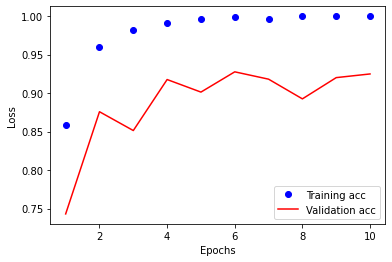

In [18]:
plt.clf()
acc_values = histo['acc']
val_acc_values = histo['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [0]:
DTt = np.concatenate((Data_train['text'][0:130],Data_train['text'][150:540]))
DTt = np.asarray(DTt)
DTitle = np.concatenate((Data_train['title'][0:130], Data_train['title'][150:540]))
DTitle = np.asarray(DTt)

In [0]:
#hot encoding text
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(DTt)

DTT = tokenizer.texts_to_matrix(DTt, mode='binary')

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(DTitle)

DTtitle = tokenizer.texts_to_matrix(DTitle, mode='binary')

In [0]:
DT = np.concatenate([DTT, DTtitle], axis=1)

In [0]:
label = np.concatenate((Data_train['label'][0:130],Data_train['label'][150:540]))

In [65]:
model.evaluate(DT, label)

520/520 [==============================] - 0s 106us/step


[81.16574096679688, 0.5326923131942749]